# gaussian blur (low pass filter)

### we generally use a low pass filter first to get rid of noise and then a high pass filter for edge detection 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
%matplotlib inline

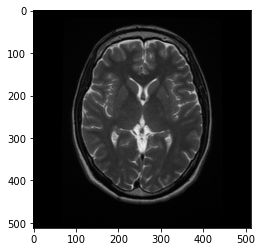

In [2]:
image = cv2.imread("brain_MR.jpg")
plt.imshow(image)

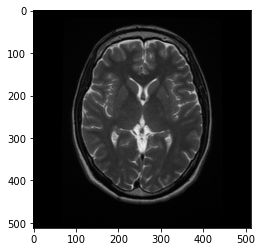

In [3]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

# applying gaussian blur

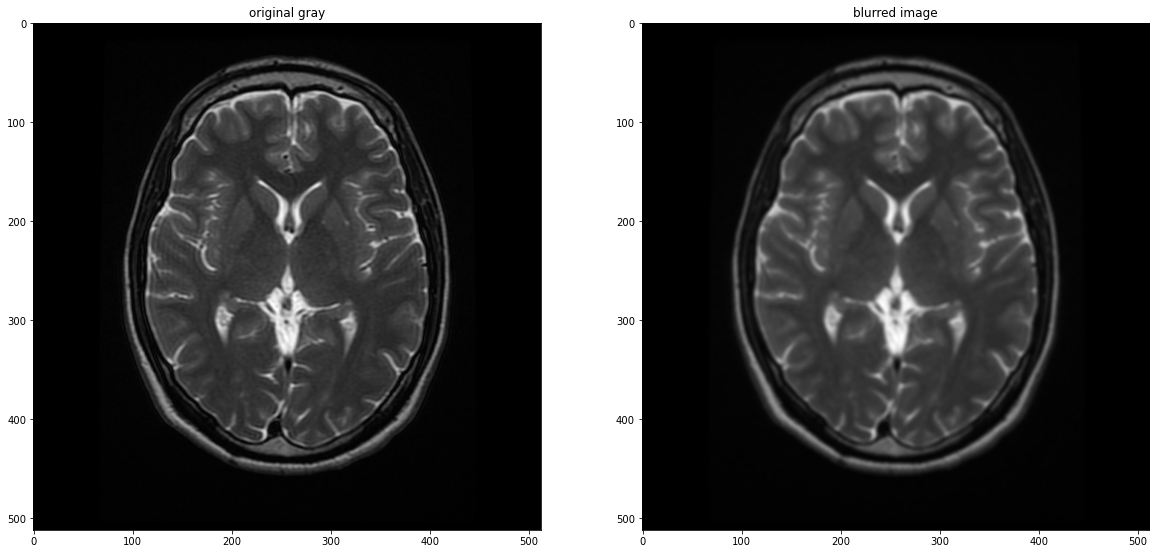

In [11]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

#creating gaussian filter with parameters image,kernel size,standard deviation (which is kept 0 for auto calculation)
gray_blur = cv2.GaussianBlur(gray,(5,5),3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

## Test performance with a HPF

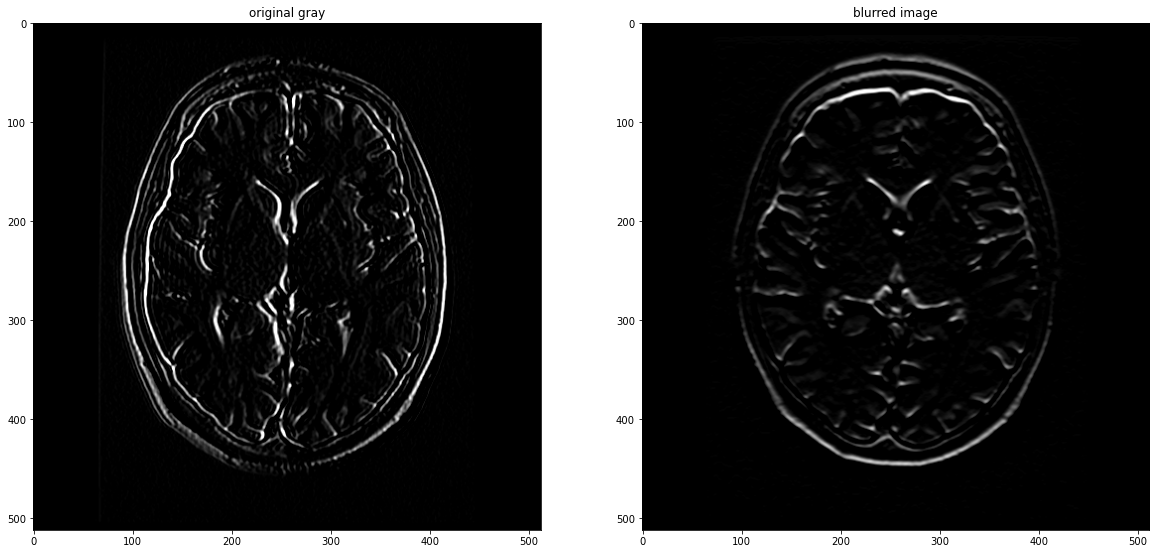

In [12]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

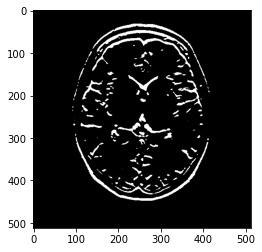

In [13]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 30, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')